![Cover](https://pbs.twimg.com/media/FSyCG-zWAAEFyBI?format=jpg&name=medium)

In Support Vector Machine we separate a data point into class attribute using hyperplane to separate our data.

In this technique, we lot each data item as a point in n-dimensional space(where n is the number of features you have) with the value of a particular coordinate. Then we perform classification by finding the hyperplane that differentiates the two classes very well.

[Click to see my article on Support Vector Machine](https://medium.com/machine-learning-researcher/support-vector-machine-a57e575b05bb)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Information of Dataset </font>

<b>Diabetes Dataset:</b> This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.
<b> Attribute Information </b> <br>
`Pregnancies:` Number of times pregnant <br>
`Glucose:` Plasma glucose concentration a 2 hours in an oral glucose tolerance test <br>
`BloodPressure:` Diastolic blood pressure (mm Hg) <br>
`SkinThickness:` Triceps skin fold thickness (mm) <br>
`Insulin:` 2-Hour serum insulin (mu U/ml) <br>
`BMI:` Body mass index (weight in kg/(height in m)^2) <br>
`DiabetesPedigreeFunction:` Diabetes pedigree function <br>
`Age:` Age (years) <br>
`Outcome:` Class variable (0 or 1) <br>

https://www.kaggle.com/datasets/mathchi/diabetes-data-set

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue> Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize, fmin_tnc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter

#### <font color = blue>Import the Dataset

In [91]:
df = pd.read_csv("Dataset/diabetes.csv")
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Summary and Visualization </font>

#### <font color = blue>Data shape

In [84]:
print("Number of columns:", df.shape[1])
print("Number of rows: ", df.shape[0])

Number of columns: 9
Number of rows:  768


#### <font color = blue>Data Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### <font color = blue>Data Description

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### <font color = blue> Visualize the Label Class

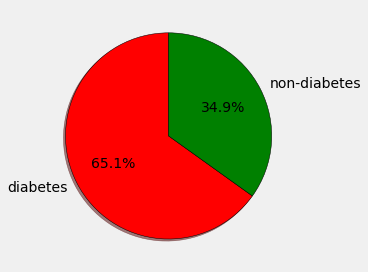

In [10]:
plt.style.use('fivethirtyeight')
diabetes = df[df['Outcome'] == 0].shape[0]
non_diabetes = df[df['Outcome'] == 1].shape[0]

label = [diabetes, non_diabetes]
plt.pie(label, labels = ['diabetes', 'non-diabetes'], shadow = True, wedgeprops = {'edgecolor': 'black'},
        autopct = '%4.1f%%', startangle = 90, colors = ['red', 'green'])
plt.tight_layout()
plt.show()

#### <font color = blue> Realtionship of Features

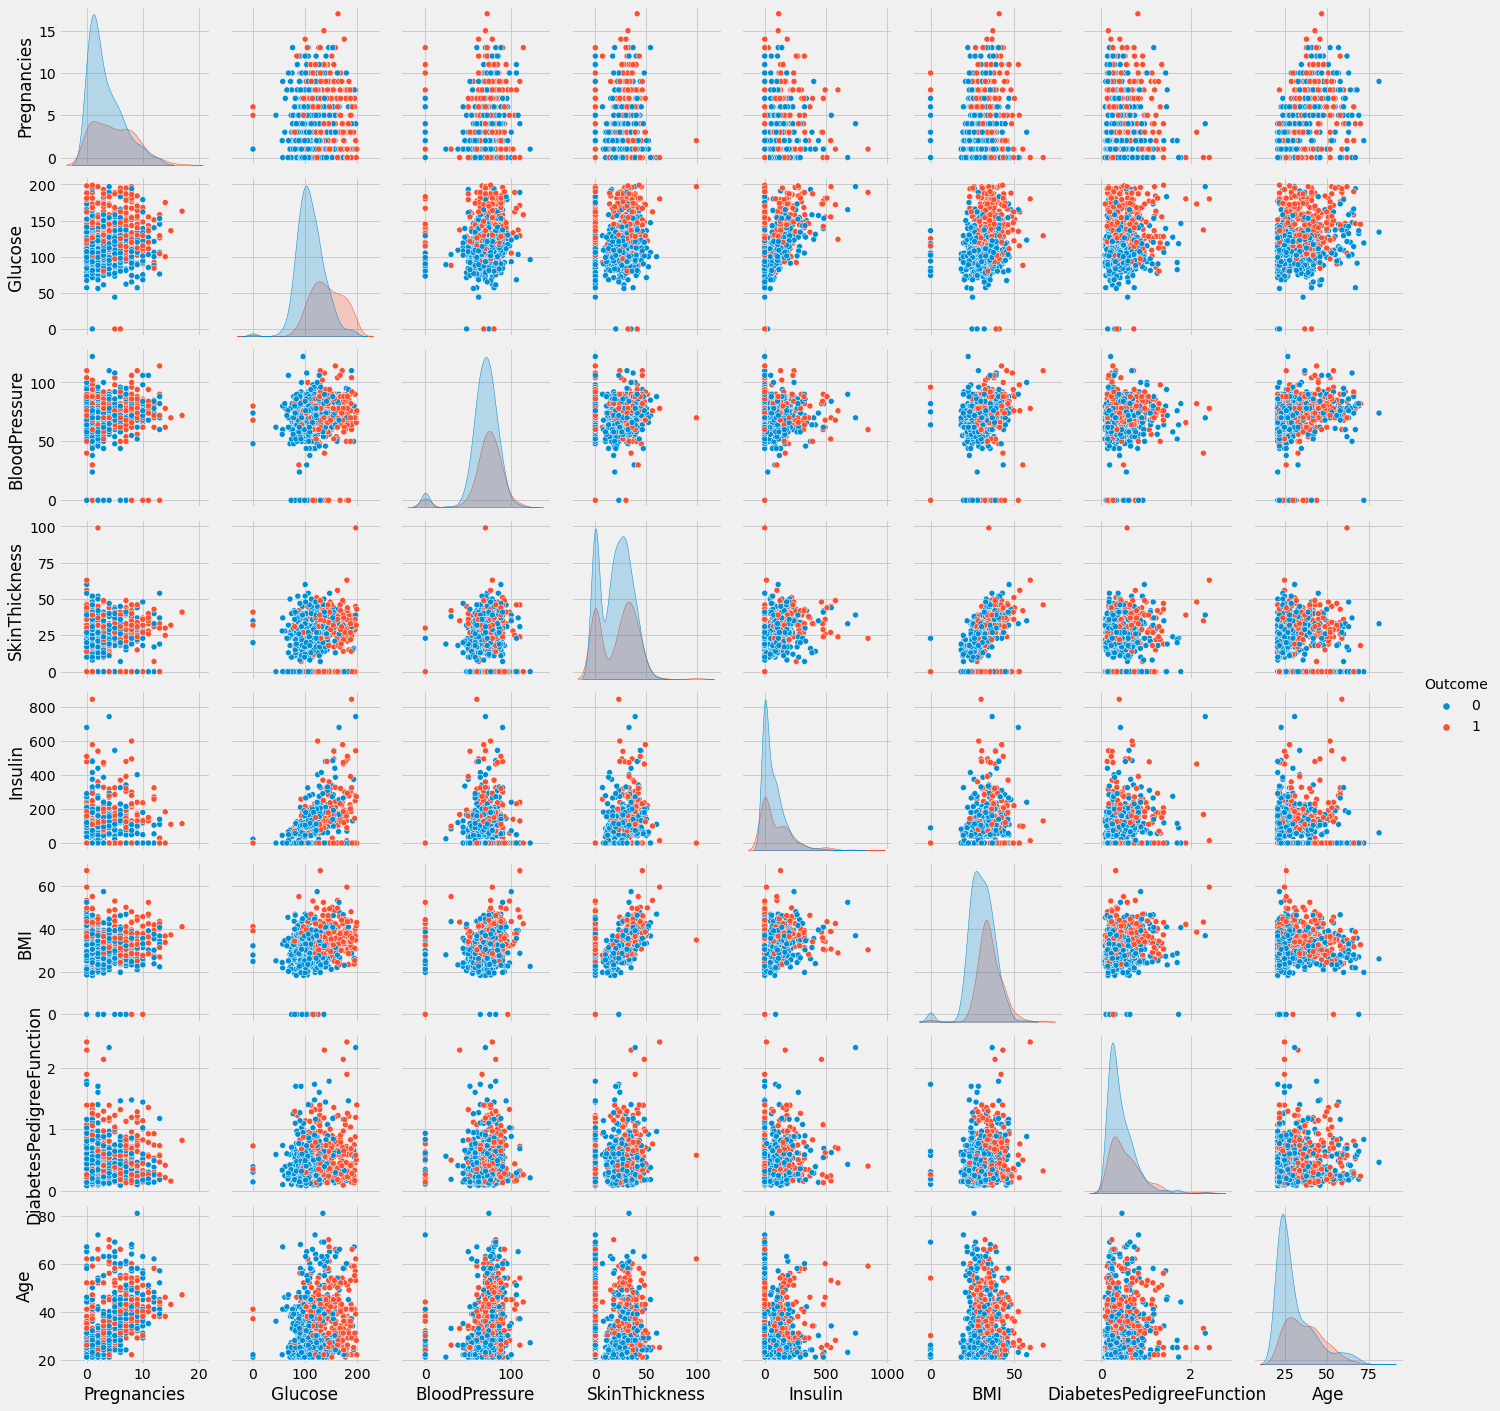

In [11]:
sns.pairplot(df, hue = 'Outcome')  # blue = diabetes, red = non-diabetes class

#### <font color = blue> Check the Correaltion of Features

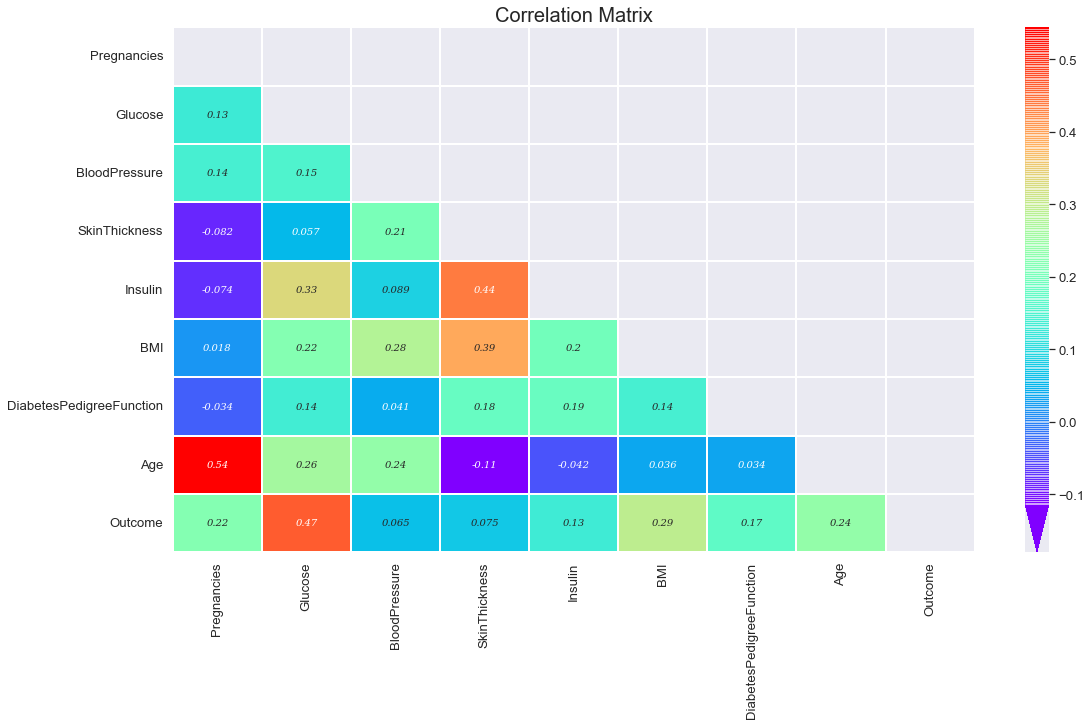

In [14]:
# Define the figure size
plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(df.corr())

# Generate heatmap correlation
ax = sns.heatmap(df.corr(), mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Matrix', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Preprocessing </font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Define Predictor and target Attribute </font>

In [92]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

#### <font color = blue> Predictor Attribute

In [93]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


#### <font color = blue> Target Attribute

In [94]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Dealing with Missing Value </font>

#### <font color = blue> Check the Missing Value

In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### <font color = #27C3E5> 2.3: </font> <font color = #41EA46> Feature Scaling </font>

#### <font color = blue> Apply Standard Scaler

In [96]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

#### <font color = blue> After apply Standard Scaler

In [100]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


### <font color = #27C3E5> 2.4: </font> <font color = #41EA46> Split the Data into Train and Test </font>

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### <font color = blue> Training Data

In [23]:
print("X_test", X_train.shape)
print("X_test", y_train.shape)

X_test (614, 8)
X_test (614,)


#### <font color = blue> Testing Data

In [24]:
print("X_test", X_test.shape)
print("X_test", y_test.shape)

X_test (154, 8)
X_test (154,)


![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Build Support Vector Machine  </font>
In this part, we build Support Vector Machine Classification Model using Scikit-Learn

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### <font color = blue> Import Model from Sklearn

In [34]:
from sklearn.svm import SVC

#### <font color = blue> Initialize the Model

In [87]:
clf = SVC(
          C=1.0,                          # The regularization parameter
          kernel='linear',                # The kernel type used 
       #  degree=3,                       # Degree of polynomial function 
          gamma='scale',                  # The kernel coefficient
          coef0=0.0,                      # If kernel = 'poly'/'sigmoid'
          shrinking=True,                 # To use shrinking heuristic
          probability=False,              # Enable probability estimates
          tol=0.001,                      # Stopping crierion
          cache_size=200,                 # Size of kernel cache
          class_weight=None,              # The weight of each class
          verbose=False,                  # Enable verbose output
          max_iter=- 1,                   # Hard limit on iterations
          decision_function_shape='ovr',  # One-vs-rest or one-vs-one
          break_ties=False,               # How to handle breaking ties
          random_state=None               # Random state of the model
)

#### <font color = blue> Fit the Model

In [88]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

#### <font color = blue> Predict the Test Data</font>

In [89]:
y_pred = clf.predict(X_test)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Evaluate the Result </font>
In this part, we evaluate the Support Vector Machine. first we make confusion matrix and we visualize the score following ("Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error" and "Roc Area").

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 4.1: </font> <font color = #41EA46> Confusion Matrix</font>

<AxesSubplot:>

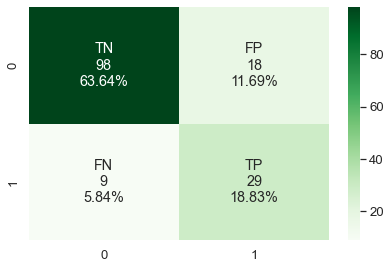

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix_ = confusion_matrix(y_pred, y_test)

#[row, column]
TP = confusion_matrix_[1, 1]        
TN = confusion_matrix_[0, 0]           
FP = confusion_matrix_[0, 1]           
FN = confusion_matrix_[1, 0]

group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_.flatten()/np.sum(confusion_matrix_)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix_, annot=labels, fmt='', cmap='Greens')

### <font color = #27C3E5> 4.2: </font> <font color = #41EA46>  Evaluate the Results </font>

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

#### <font color = blue>4.2.1: Calculate the Results

In [31]:
# Accuracy Score
Accuracy = accuracy_score(y_pred, y_test)
print('Accuracy Score:', Accuracy) 

# Precision Score
Precision = precision_score(y_pred, y_test)
print('Precision Score:', Precision)   

# True positive Rate (TPR) or Sensitivity or Recall
TPR = recall_score(y_pred, y_test)
print('True positive Rate:', TPR)             

# False positive Rate (FPR)
FPR = FP / float(TN + FP)
print('False positive Rate', FPR)                       

# F1 Score or F-Measure or F-Score
F1 = f1_score(y_pred, y_test)
print('F1 Score:', F1)                 

# Specificity
Specificity = TN / (TN + FP)
print('Specificity:', Specificity)                    

# Mean Absolute Error
Error = mean_absolute_error(y_pred, y_test)
print('Mean Absolute Error:', Error)   

# ROC Area
Roc = roc_auc_score(y_pred, y_test)
print('ROC Area:', Roc) 

Accuracy Score: 0.8246753246753247
Precision Score: 0.6170212765957447
True positive Rate: 0.7631578947368421
False positive Rate 0.15517241379310345
F1 Score: 0.6823529411764706
Specificity: 0.8448275862068966
Mean Absolute Error: 0.17532467532467533
ROC Area: 0.8039927404718693


#### <font color = blue>4.2.2: Visualize the Results

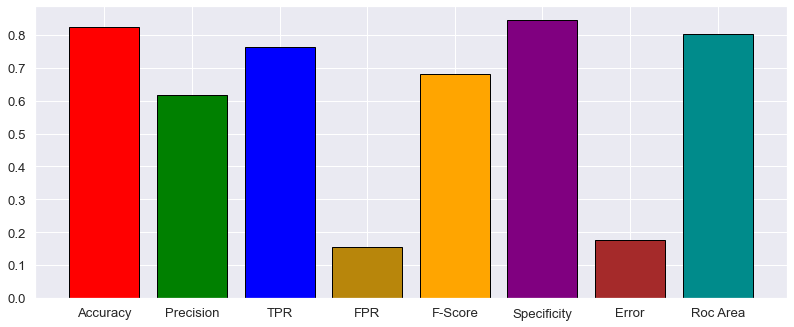

In [32]:
plt.figure(figsize = (12, 5))

result = [Accuracy, Precision, TPR, FPR, F1, Specificity, Error, Roc]
label = ["Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error", "Roc Area"]
colors=[ 'red', 'green', 'blue', 'darkgoldenrod', 'orange', 'purple', 'brown', 'darkcyan']

plt.bar(label, result, color = colors, edgecolor='black')
plt.show()

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<b>©</b>Amir Ali